## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import seaborn as sns

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
drop_cols = ['EIN', 'NAME']
application_df.drop(drop_cols, axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
counts = pd.DataFrame(application_df.value_counts('APPLICATION_TYPE'))
counts

,0
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_types_to_replace = []
cutoff = 200
for i in range(len(counts)):
    if counts.iloc[i,0] < cutoff:
        application_types_to_replace.append(counts.index[i])
        
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_counts = pd.DataFrame(application_df['CLASSIFICATION'].value_counts())
class_counts

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1
C4500,1


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

classifications_to_replace = []
cutoff = 1000
for i in range(len(class_counts)):
    if class_counts.iloc[i,0] < cutoff:
        classifications_to_replace.append(class_counts.index[i])

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df, drop_first=True) #Try dropping the correlated columns
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [10]:
application_df.drop(application_df[application_df.ASK_AMT > 1000000].index, inplace=True) #Getting rid of ASK_AMT's larger than $1000000

In [11]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')
y.value_counts()

1    17557
0    15165
Name: IS_SUCCESSFUL, dtype: int64

In [12]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

scaler.fit(X_train[['ASK_AMT']]) #Fitting the scaler object using JUST the training data

X_train_scaled = scaler.transform(X_train[["ASK_AMT"]]) #Now, transforming the training and testing dataset using the scaler object
X_test_scaled = scaler.transform(X_test[["ASK_AMT"]])

X_train['ASK_AMT'] = X_train_scaled
X_test['ASK_AMT'] = X_test_scaled

In [14]:
X_train['ASK_AMT'].describe() #Checking to make sure the mean is 0 and STD is 1

count    2.454100e+04
mean    -1.679291e-17
std      1.000020e+00
min     -2.937706e-01
25%     -2.937706e-01
50%     -2.937706e-01
75%     -2.937706e-01
max      8.034287e+00
Name: ASK_AMT, dtype: float64

(0.0, 100.0)

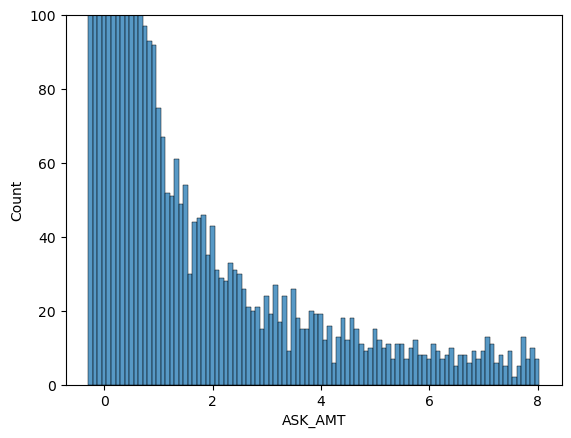

In [15]:
import matplotlib.pyplot as plt
sns.histplot(X_train, x='ASK_AMT', bins=100) #Looking at a histogram of the ASK_AMT column to see if there are outliers
plt.ylim(0, 100)

In [16]:
#Converting dataframes into arrays so they are compatible with the sklearn .fit function
X_train = X_train.values
X_test = X_test.values

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net - Adding more nodes to the input layer and adding a fourth hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  500
hidden_nodes_layer2 = 250
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               18500     
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 169871 (663.56 KB)
Trainable params: 169871 (663.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
767/767 [==============================] - 2s 2ms/step - loss: 0.5633 - accuracy: 0.7298
Epoch 2/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7367
Epoch 3/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7389
Epoch 4/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7391
Epoch 5/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7392
Epoch 6/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7404
Epoch 7/100
767/767 [==============================] - 2s 3ms/step - loss: 0.5417 - accuracy: 0.7410
Epoch 8/100
767/767 [==============================] - 3s 3ms/step - loss: 0.5394 - accuracy: 0.7415
Epoch 9/100
767/767 [==============================] - 5s 6ms/step - loss: 0.5391 - accuracy: 0.7419
Epoch 10/100
767/767 [==============================] - 3s 3ms/step - loss: 0.5390 - accura

767/767 [==============================] - 2s 2ms/step - loss: 0.5190 - accuracy: 0.7509
Epoch 82/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5172 - accuracy: 0.7512
Epoch 83/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.7517
Epoch 84/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5173 - accuracy: 0.7513
Epoch 85/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5173 - accuracy: 0.7510
Epoch 86/100
767/767 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.7515
Epoch 87/100
767/767 [==============================] - 2s 2ms/step - loss: 0.5173 - accuracy: 0.7517
Epoch 88/100
767/767 [==============================] - 2s 3ms/step - loss: 0.5163 - accuracy: 0.7521
Epoch 89/100
767/767 [==============================] - 2s 3ms/step - loss: 0.5178 - accuracy: 0.7521
Epoch 90/100
767/767 [==============================] - 2s 3ms/step - loss: 0.5173 - accuracy: 

In [20]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 - 0s - loss: 0.5994 - accuracy: 0.7311 - 487ms/epoch - 2ms/step
Loss: 0.5994203090667725, Accuracy: 0.7310842275619507


In [21]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupCharity_Optimization_2.h5')

C:\Users\gmich\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
